#**Heart Disease Prediction**
**Use a dataset containing medical data of patients to predict if a person has heart disease or not.**

#**Importing necessary libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Google drive mounting**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/heart_disease_data.csv')

#**Data Summarization**

In [ ]:
data.head()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2006,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
1,2005,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
2,2007,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,...,Age,65+,C1,T4,MD301,Crude,BOC03,AGE06,59,NaN
3,2008,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,...,Gender,Female,C1,T4,MD301,Crude,BOC02,GEN02,59,NaN
4,2004,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Overall,Overall,C1,T5,MD501,Crude,BOC01,OVR01,59,NaN


In [ ]:
data.tail()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
42635,2012,CO,Colorado,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,...,Gender,Male,C1,T6,MD601,Crude,BOC02,GEN01,8,"(38.843840757000464, -106.13361092099967)"
42636,2010,MI,Michigan,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,...,Gender,Female,C1,T6,MD601,Crude,BOC02,GEN02,26,"(44.6613195430005, -84.71439026999968)"
42637,2012,ME,Maine,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,...,Race,Hispanic,C1,T6,MD601,Crude,BOC04,RAC04,23,"(45.254228894000505, -68.98503133599962)"
42638,2013,ID,Idaho,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,...,Race,Non-Hispanic White,C1,T6,MD601,Crude,BOC04,RAC01,16,"(43.682630005000476, -114.3637300419997)"
42639,2012,IA,Iowa,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,...,Gender,Male,C1,T6,MD601,Crude,BOC02,GEN01,19,"(42.46940091300047, -93.81649055599968)"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        42640 non-null  int64  
 1   LocationAbbr                42640 non-null  object 
 2   LocationDesc                42640 non-null  object 
 3   DataSource                  42640 non-null  object 
 4   PriorityArea1               42640 non-null  object 
 5   PriorityArea2               42640 non-null  object 
 6   PriorityArea3               42640 non-null  object 
 7   PriorityArea4               42640 non-null  object 
 8   Category                    42640 non-null  object 
 9   Topic                       42640 non-null  object 
 10  Indicator                   42640 non-null  object 
 11  Data_Value_Type             42640 non-null  object 
 12  Data_Value_Unit             42640 non-null  object 
 13  Data_Value                  421

In [ ]:
data.shape

(42640, 29)

In [ ]:
data.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'DataSource', 'PriorityArea1',
       'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Category', 'Topic',
       'Indicator', 'Data_Value_Type', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'Break_Out_Category',
       'Break_Out', 'CategoryId', 'TopicId', 'IndicatorID',
       'Data_Value_TypeID', 'BreakOutCategoryId', 'BreakOutId', 'LocationID',
       'GeoLocation'],
      dtype='object')

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,42640.0,2008.500000,2.872315,2004.0,2006.00,2008.5,2011.0,2013.0
Data_Value,42111.0,14.780896,13.286487,0.4,4.50,10.7,21.6,333.3
Data_Value_Alt,42640.0,14.572709,13.333826,-2.0,4.40,10.4,21.5,333.3
LowConfidenceLimit,42111.0,12.661509,11.453615,0.0,3.80,8.2,19.6,94.2
HighConfidenceLimit,42111.0,17.074028,17.910274,1.1,5.00,12.7,23.4,710.5
LocationID,42640.0,29.538462,16.064317,1.0,16.75,29.5,42.5,59.0


Value count:

In [ ]:
# Value counts of location description
data.value_counts(['LocationDesc'])

LocationDesc  
Alabama           820
Alaska            820
New Hampshire     820
New Jersey        820
New Mexico        820
New York          820
North Carolina    820
North Dakota      820
Ohio              820
Oklahoma          820
Oregon            820
Pennsylvania      820
Rhode Island      820
South Carolina    820
South Dakota      820
Tennessee         820
Texas             820
United States     820
Utah              820
Vermont           820
Virginia          820
Washington        820
Washington, DC    820
West Virginia     820
Wisconsin         820
Nevada            820
Nebraska          820
Montana           820
Illinois          820
Arizona           820
Arkansas          820
California        820
Colorado          820
Connecticut       820
Delaware          820
Florida           820
Georgia           820
Hawaii            820
Idaho             820
Indiana           820
Missouri          820
Iowa              820
Kansas            820
Kentucky          820
Louisiana        

Equal number of data is collected from each location in US.

In [ ]:
data.value_counts(['Year'])

Year
2004    4264
2005    4264
2006    4264
2007    4264
2008    4264
2009    4264
2010    4264
2011    4264
2012    4264
2013    4264
dtype: int64

Same number of dataset(4264) is collected from 2004 to 2013

In [ ]:
data.value_counts(['Topic'])

Topic                                     
Heart Failure                                 19240
Acute Myocardial Infarction (Heart Attack)     4680
Coronary Heart Disease                         4680
Diseases of the Heart (Heart Disease)          4680
Major Cardiovascular Disease                   4680
Stroke                                         4680
dtype: int64

6 Topics are present in the Dataset.

In [ ]:
data.value_counts(['Indicator'])

Indicator                                                                                                                                           
Prevalence of all heart disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                                        4680
Prevalence of cerebrovascular disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                                  4680
Prevalence of coronary heart disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                                   4680
Prevalence of heart attack hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                                             4680
Prevalence of heart failure hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                                            4680
Prevalence of major cardiovascular disease hospitalizations among 

In [ ]:
data.nunique()

Year                            10
LocationAbbr                    52
LocationDesc                    52
DataSource                       1
PriorityArea1                    2
PriorityArea2                    1
PriorityArea3                    2
PriorityArea4                    1
Category                         1
Topic                            6
Indicator                       10
Data_Value_Type                  1
Data_Value_Unit                  2
Data_Value                     813
Data_Value_Alt                 814
Data_Value_Footnote_Symbol       1
Data_Value_Footnote              1
LowConfidenceLimit             680
HighConfidenceLimit           1059
Break_Out_Category               4
Break_Out                        9
CategoryId                       1
TopicId                          6
IndicatorID                     10
Data_Value_TypeID                1
BreakOutCategoryId               4
BreakOutId                       9
LocationID                      52
GeoLocation         

In [ ]:
data.isnull().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
PriorityArea1                     0
PriorityArea2                     0
PriorityArea3                     0
PriorityArea4                     0
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                      529
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    42111
Data_Value_Footnote           42111
LowConfidenceLimit              529
HighConfidenceLimit             529
Break_Out_Category                0
Break_Out                         0
CategoryId                        0
TopicId                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakOutCategoryId                0
BreakOutId                        0
LocationID                  

#**Exploratory Data Analysis**

**Univariate Analysis**

**1.Pie chart of different categories of people taken for survey.**



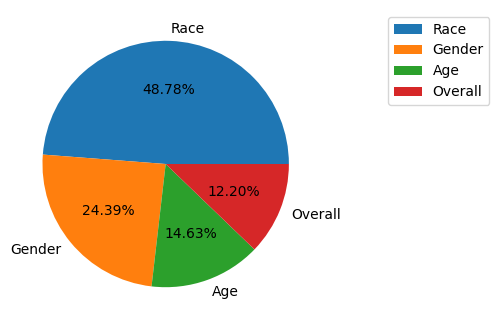

In [ ]:
# Plotting pie chart of break_out_category
review_percent = data.Break_Out_Category.value_counts().reset_index()
plt.figure(figsize=(6,4))
ax = plt.subplot(111)
plt.pie(x = review_percent['Break_Out_Category'], labels= review_percent['index'],autopct= '%1.2f%%')
plt.legend()
ax.legend(bbox_to_anchor=(1.2, 1))

plt.show()

Break out category is divided into Age, Gender, Race and Overall and which is again divided in to the different categories.

<Axes: xlabel='Break_Out', ylabel='count'>

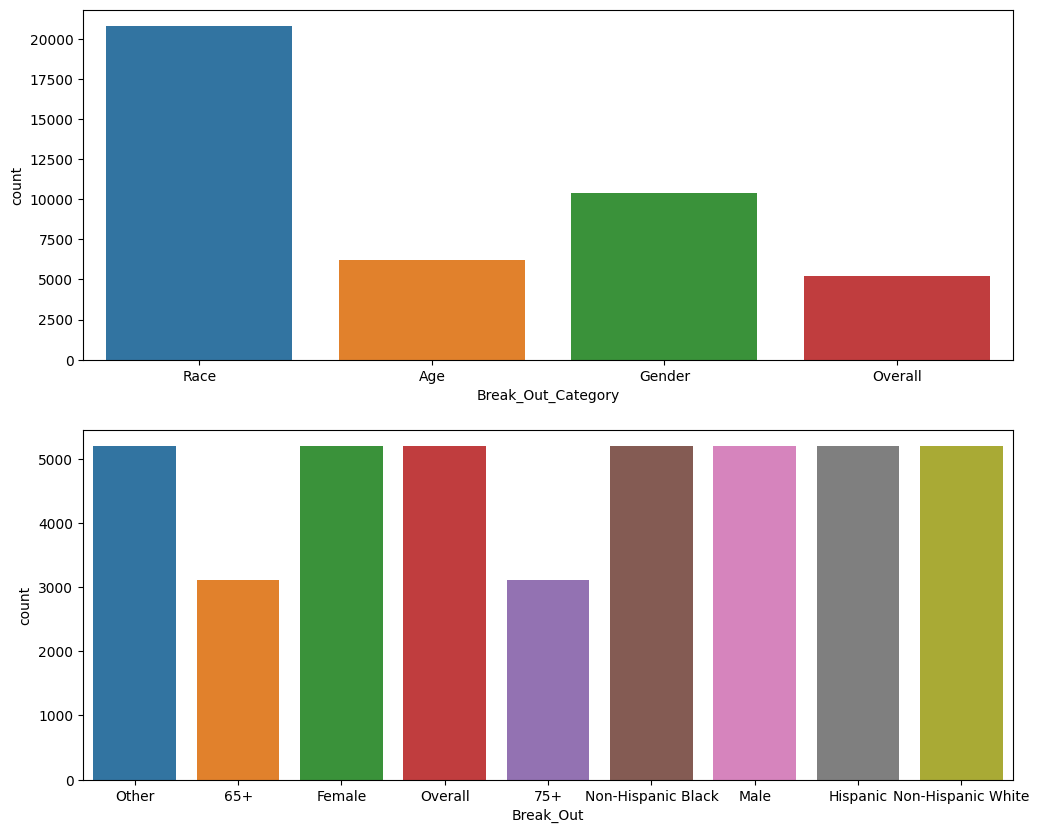

In [ ]:
fig , axes=plt.subplots(nrows=2, ncols=1,figsize=(12,10))

sns.countplot(data=data, x="Break_Out_Category",ax=axes[0])
sns.countplot(data=data, x="Break_Out",ax=axes[1])


**2.Histogram of Topic**

Text(0.5, 1.0, 'Histogram of Topic')

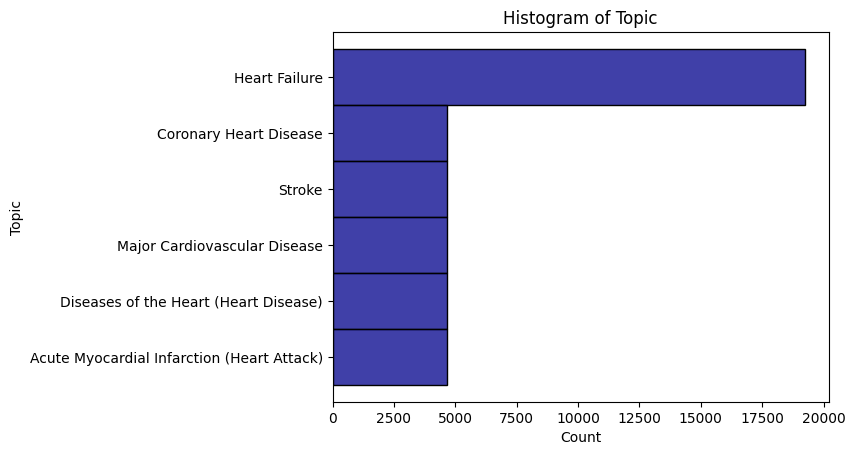

In [ ]:
# Histplot of Topic to find out the count
sns.histplot(y="Topic",data=data,color="darkblue",edgecolor='black')
plt.title('Histogram of Topic')

This graph shows the health conditions of US residents.

From this graph, it is clear that Heart Failure is very high as compared to others .

**3.Frequency graph of dataset**

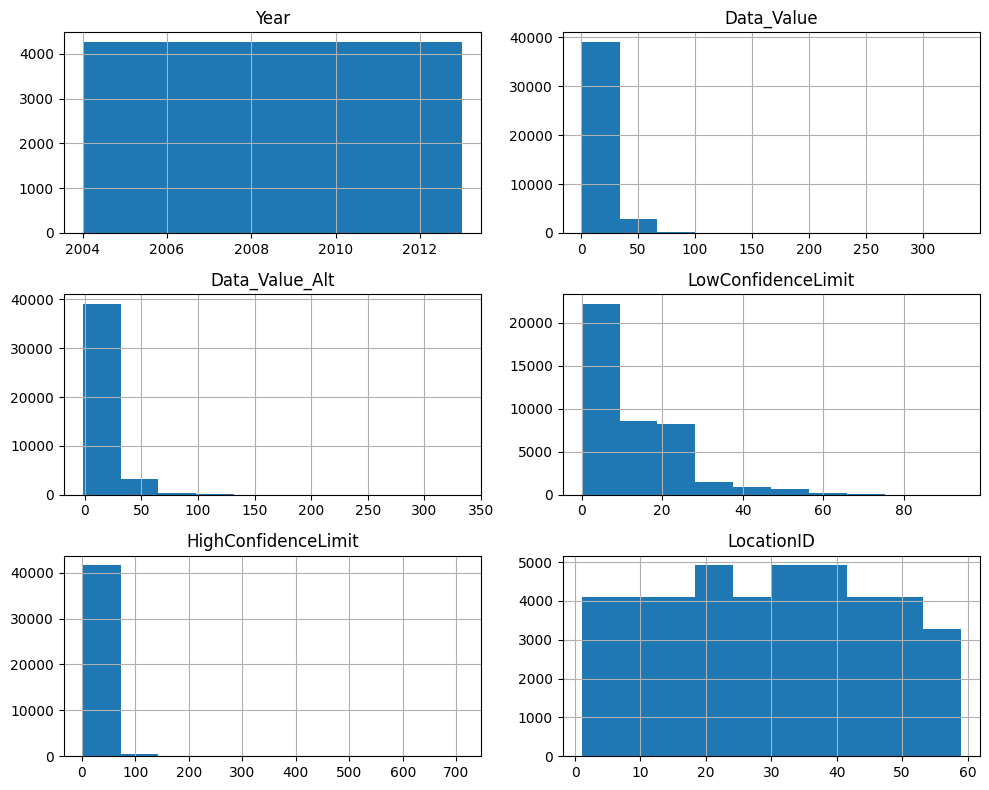

In [ ]:
# Frequency graph of dataset
freqgraph=data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

**4.Plot of Priority Areas**

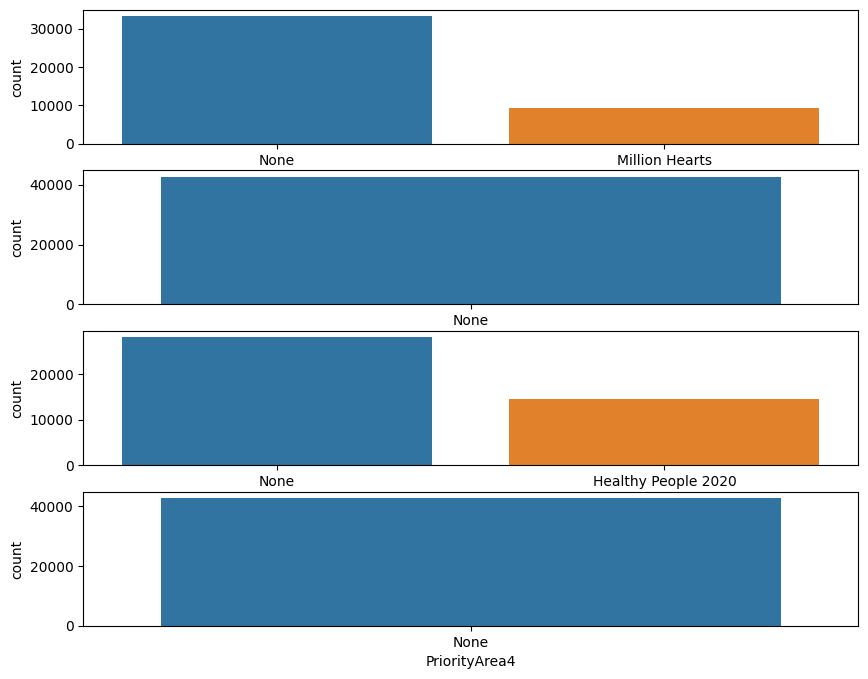

In [ ]:
#PriorityAreas
fig , axes=plt.subplots(nrows=4 , ncols=1,figsize=(10,8))
sns.countplot(data=data, x="PriorityArea1",ax=axes[0])
sns.countplot(data=data, x="PriorityArea2",ax=axes[1])
sns.countplot(data=data, x="PriorityArea3",ax=axes[2])
sns.countplot(data=data, x="PriorityArea4",ax=axes[3])
plt.show()

PriorityArea2,PriorityArea4 contains None values throughout, also these variables dont serve any purpose in prediction of our target variable.Let us drop those variables.

**5.Plot of DataSource,Category and Data value type**

<Axes: xlabel='Data_Value_Type', ylabel='count'>

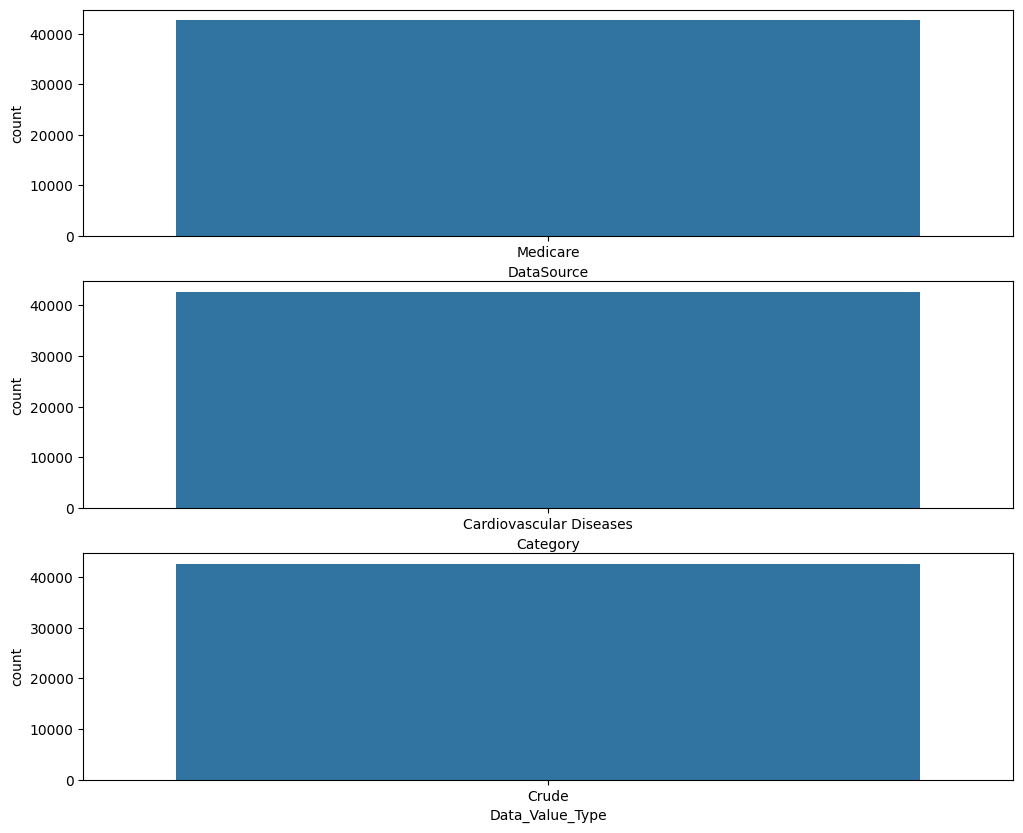

In [ ]:
fig , axes=plt.subplots(nrows=3, ncols=1,figsize=(12,10))
sns.countplot(data=data, x="DataSource",ax=axes[0])
sns.countplot(data=data, x="Category",ax=axes[1])
sns.countplot(data=data, x="Data_Value_Type",ax=axes[2])

Data source have medicare values throughout also category column consists of cardiovascular diseases values entirely.This is not a variable feature in our dataset ,it is observed that it is constant throughout.Hence dropping them wil not affect our prediction.

**Multivariate Analysis**

**1.Correlation Heatmap**

In [ ]:
data.corr()

,Year,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,LocationID
Year,1.000000e+00,-0.077007,-0.075248,-0.072663,-0.068399,3.245610e-15
Data_Value,-7.700690e-02,1.000000,1.000000,0.887767,0.932128,8.903116e-03
Data_Value_Alt,-7.524775e-02,1.000000,1.000000,0.887767,0.932128,2.931967e-03
LowConfidenceLimit,-7.266295e-02,0.887767,0.887767,1.000000,0.666933,5.041639e-03
HighConfidenceLimit,-6.839893e-02,0.932128,0.932128,0.666933,1.000000,1.190213e-02
LocationID,3.245610e-15,0.008903,0.002932,0.005042,0.011902,1.000000e+00


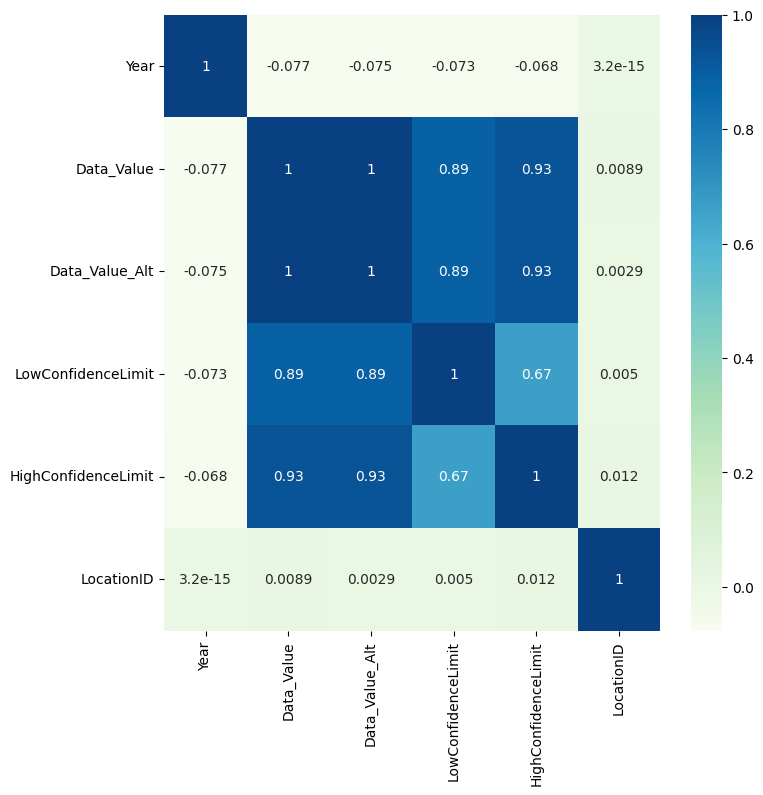

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='GnBu')
plt.show()

From above correlation it is clear that Data_value and Data_Value_Alt are similar.Also high correlation is seen between Data_value,HighConfidenceLimit and LowConfidenceLimit

**2.Pairplot**

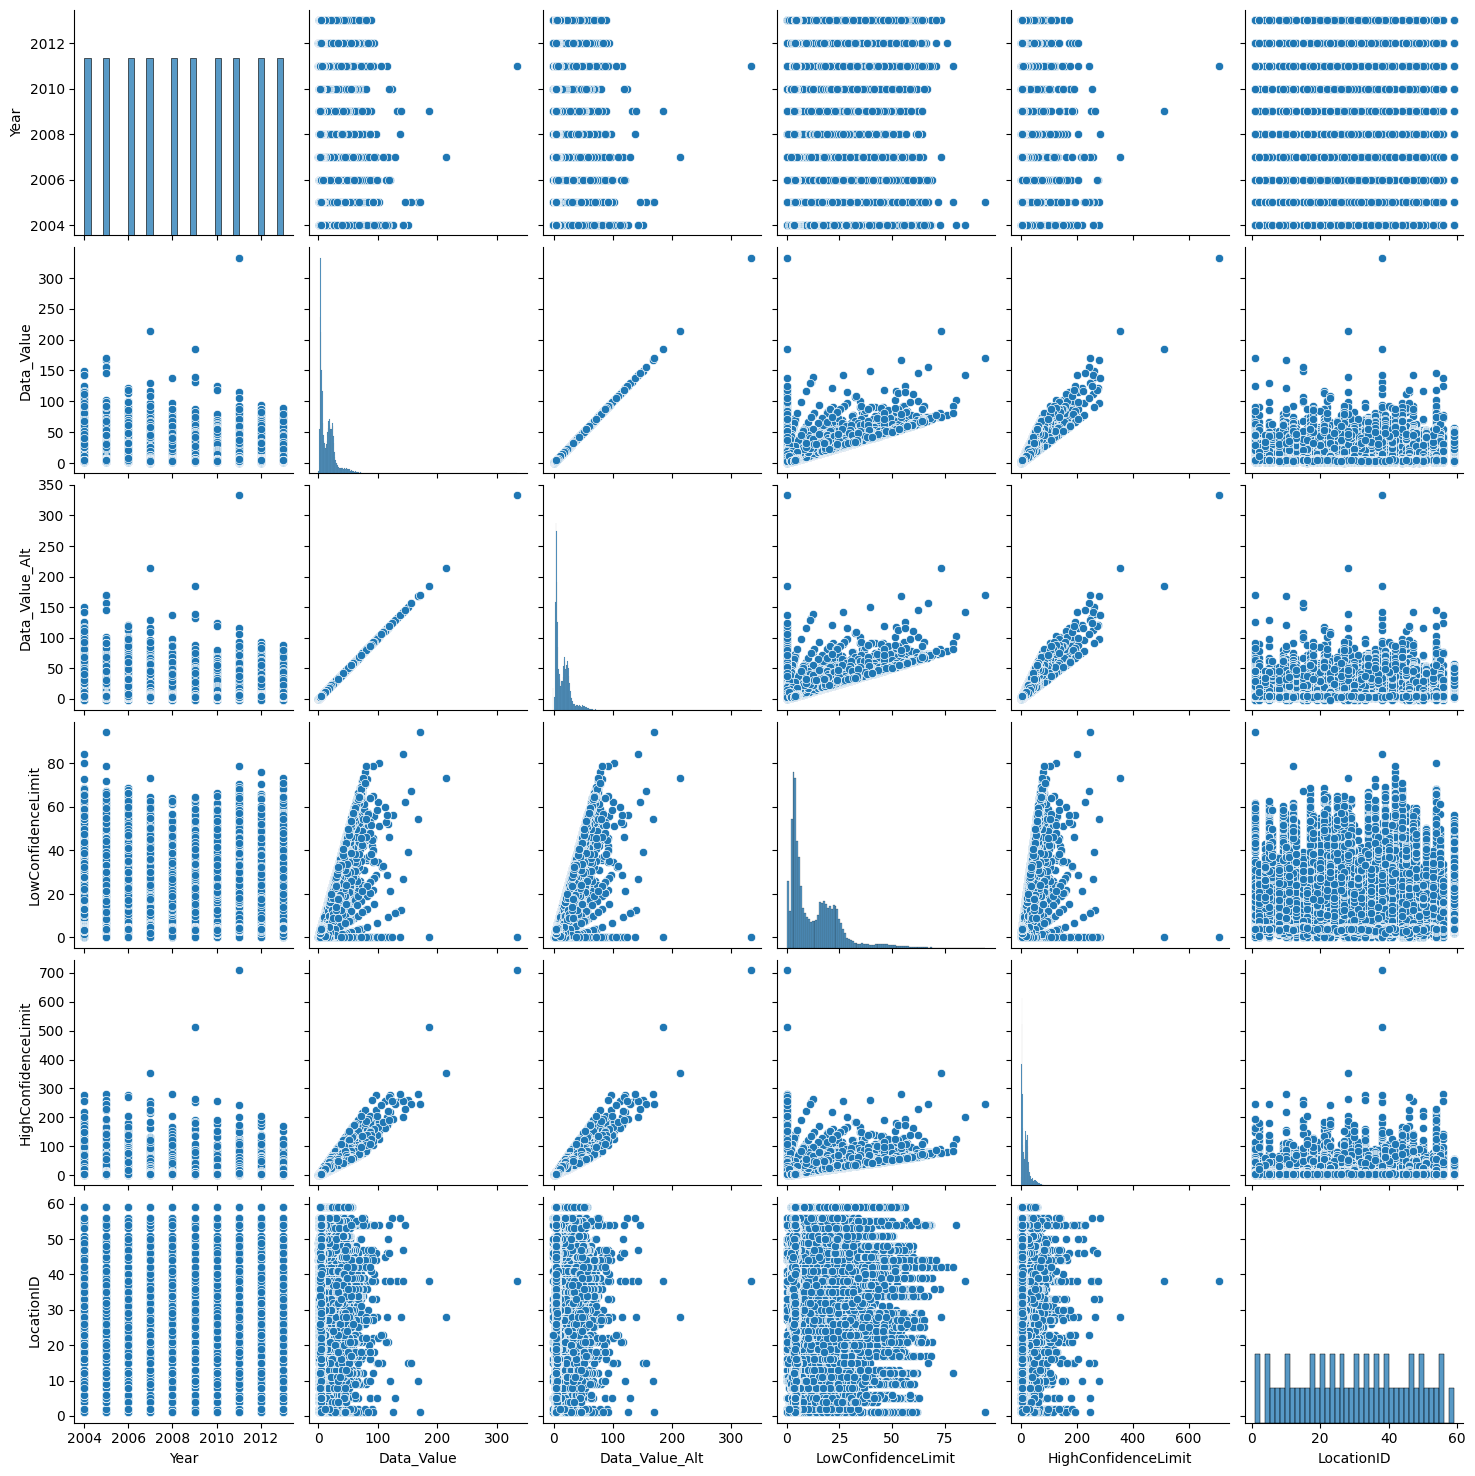

In [ ]:
sns.pairplot(data)

#**Data Cleaning**

**1.Missing values**

In [ ]:
# Checking Duplicate Values
print(len(data[data.duplicated()]))

0


In [ ]:
#Checking for null values
data.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
PriorityArea1                     0
PriorityArea2                     0
PriorityArea3                     0
PriorityArea4                     0
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                      529
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    42111
Data_Value_Footnote           42111
LowConfidenceLimit              529
HighConfidenceLimit             529
Break_Out_Category                0
Break_Out                         0
CategoryId                        0
TopicId                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakOutCategoryId                0
BreakOutId                        0
LocationID                  

<Axes: >

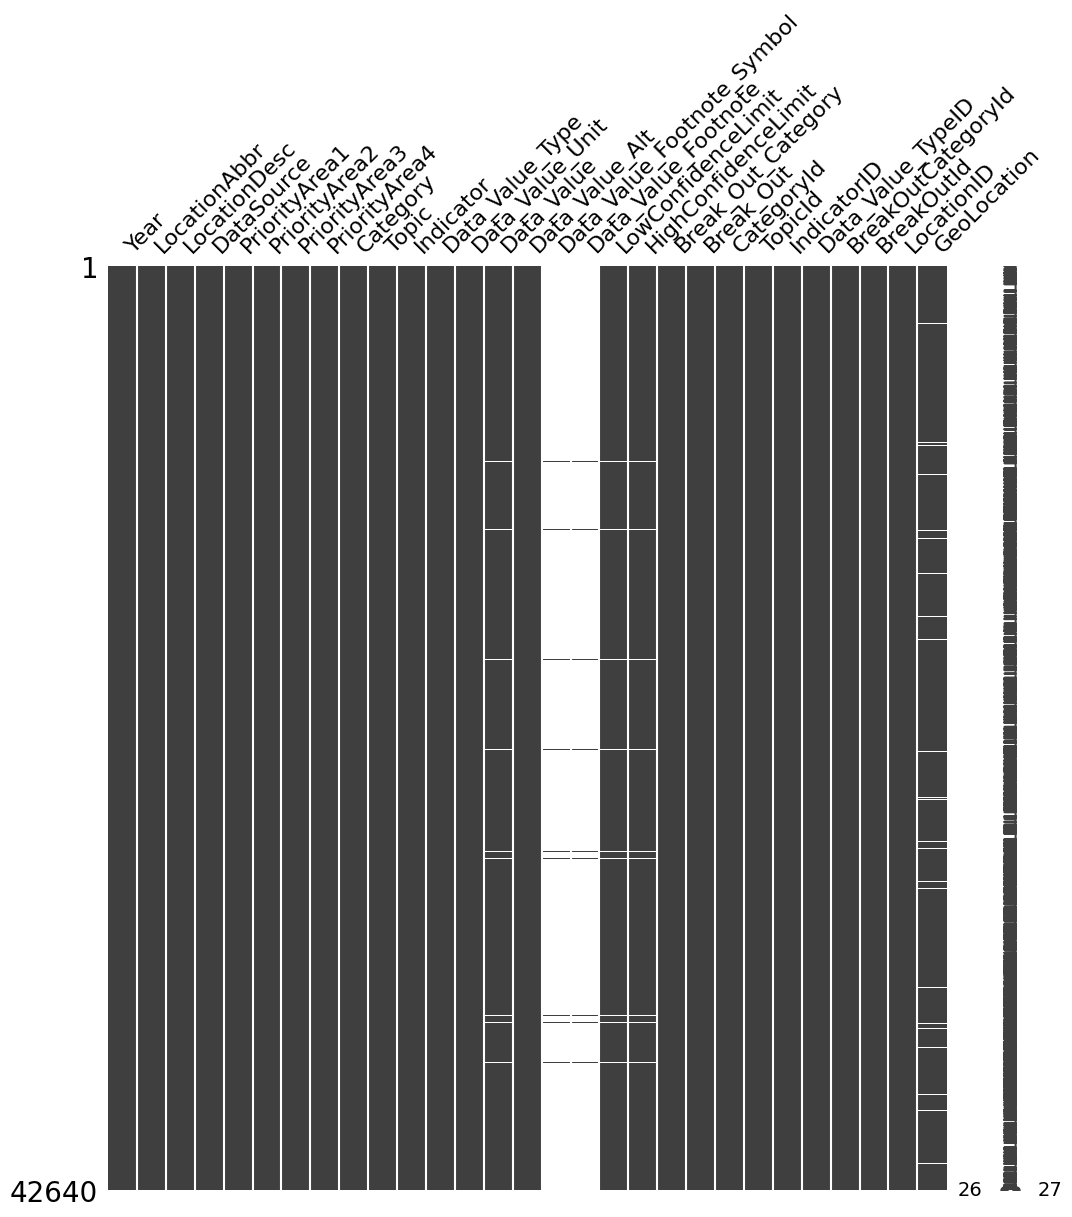

In [ ]:
#Missing Values
import missingno as msno
msno.matrix(data,figsize=(12,12))

There are total 86629 missing values in the given dataset.

From this, 529 Missing values are in Datavalue variabe.

42111 missing values each for Data value foot note symbol and Datavalue foot note. This can affect the performance of our model.

529 missing values each for confidence limit low and confidence limit high respectvely.

820 missing values for Geolocation.

In [ ]:
#Columns: Data_Value_Footnote_Symbol,Data_Value_Footnote consists tremendous number of missing values and are not required for prediction.
#It is adviseable to drop them.Also GeoLocation is to be dropped as it is unnecessary for prediction
#Dropping Data_Value
data.drop('Data_Value_Footnote_Symbol', axis = 1,inplace=True)
data.drop('Data_Value_Footnote', axis = 1,inplace=True)
data.drop('GeoLocation', axis = 1,inplace=True)
data.drop('Data_Value', axis = 1,inplace=True)

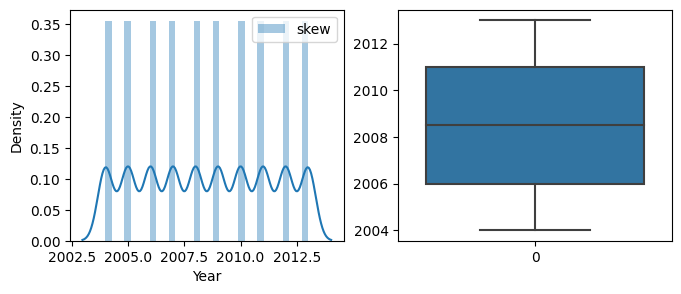

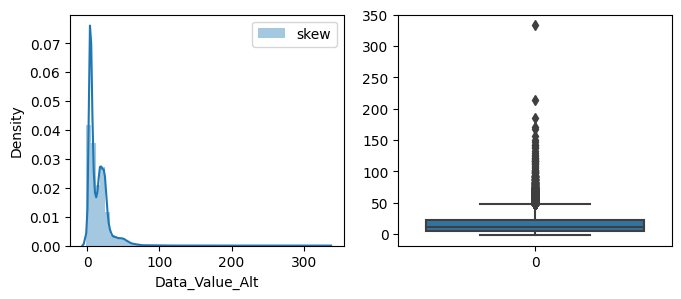

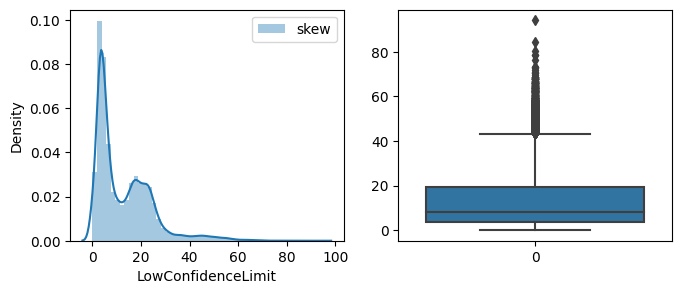

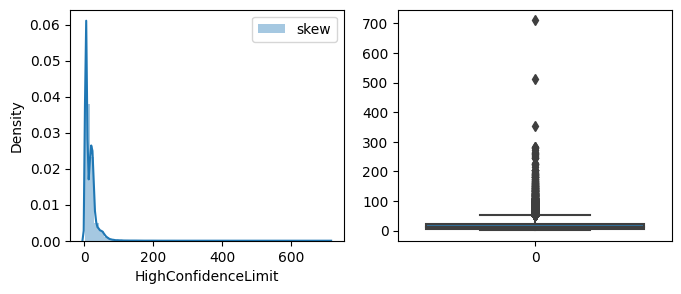

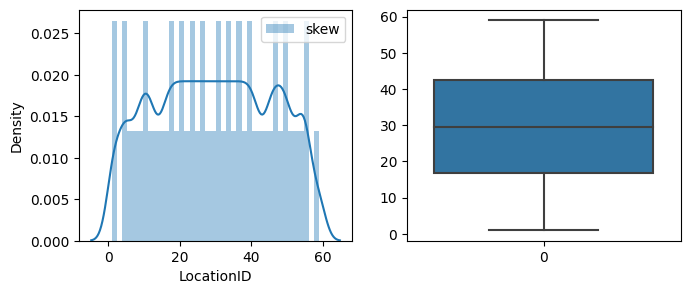

In [ ]:
from scipy import stats
for col in data.describe().columns:
  plt.figure(figsize=(12,3))

# Skewness Distribution
  plt.subplot(131)
  sns.distplot(data[col], label="skew" )
  plt.legend()

# Boxplot - For outliers detection
  plt.subplot(132)
  sns.boxplot(data[col])
  plt.show()

From above plot it can be observed that, year and LocationID is free from outliers where rest of the numeric features poses outliers.Also these features are right skewed.Let us see the number of null values present in them.

In [ ]:
# Filling the missing values using median(Right skewed data)

filler = data["HighConfidenceLimit"].median()
data["HighConfidenceLimit"] = data["HighConfidenceLimit"].fillna(filler)

filler = data["LowConfidenceLimit"].median()
data["LowConfidenceLimit"] = data["LowConfidenceLimit"].fillna(filler)

In [ ]:
# Recheck for null values after Filling and Dropping
data.isna().sum()

Year                   0
LocationAbbr           0
LocationDesc           0
DataSource             0
PriorityArea1          0
PriorityArea2          0
PriorityArea3          0
PriorityArea4          0
Category               0
Topic                  0
Indicator              0
Data_Value_Type        0
Data_Value_Unit        0
Data_Value_Alt         0
LowConfidenceLimit     0
HighConfidenceLimit    0
Break_Out_Category     0
Break_Out              0
CategoryId             0
TopicId                0
IndicatorID            0
Data_Value_TypeID      0
BreakOutCategoryId     0
BreakOutId             0
LocationID             0
dtype: int64

**2.Removing Outliers**

In [ ]:
# Removing outliers using interquantile range
#Defining function as we have to remove outliers from multiple columns

def outliers(data,ft):
  Q1 = data[ft].quantile(0.25)
  Q3= data[ft].quantile(0.75)
  IQR =Q3 - Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

#List to store the index values of the outliers
  ol_list = data.index[(data[ft]<lower_bound) | (data[ft]>upper_bound)]
  return ol_list

In [ ]:
#Create an empty list to store the output indices from multiple columns
index_list=[]
for feature in ['Data_Value_Alt','LowConfidenceLimit','HighConfidenceLimit']:
  index_list.extend(outliers(data,feature))

In [ ]:
print(index_list)

[1161, 6187, 23240, 23728, 24260, 24361, 24636, 26006, 26334, 26408, 26733, 26896, 27909, 28415, 29980, 30349, 30984, 31043, 31105, 31131, 31446, 31461, 31465, 31616, 31750, 31764, 31800, 31819, 31822, 32033, 32112, 32134, 32180, 32188, 32490, 32509, 32511, 32522, 32523, 32524, 32530, 32541, 32604, 32607, 32625, 32630, 32677, 32690, 32717, 32735, 32741, 32752, 32785, 32786, 32826, 32838, 32856, 32870, 32875, 32882, 32897, 32914, 32921, 32942, 32952, 32961, 33051, 33070, 33071, 33073, 33095, 33123, 33125, 33148, 33153, 33171, 33181, 33193, 33259, 33272, 33300, 33308, 33309, 33344, 33364, 33386, 33414, 33417, 33431, 33447, 33476, 33511, 33577, 33592, 33610, 33626, 33642, 33698, 33704, 33707, 33734, 33792, 33799, 33846, 33883, 33923, 33936, 33938, 34000, 34005, 34006, 34025, 34057, 34088, 34090, 34115, 34129, 34141, 34160, 34212, 34227, 34241, 34265, 34329, 34353, 34391, 34408, 34432, 34438, 34475, 34478, 34480, 34482, 34490, 34491, 34493, 34494, 34496, 34499, 34503, 34504, 34506, 34509, 

In [ ]:
#Defining remove function to get cleaned dataframe without outliers
def remove(data,ol_list):
  ol_list=sorted(set(ol_list))                          #To get the sorted list
  data=data.drop(ol_list)
  return data

In [ ]:
#Storing the cleaned data into new data frame named df1
data1=remove(data,index_list)

In [ ]:
#New shape of cleaned data
data1.shape

(40505, 25)

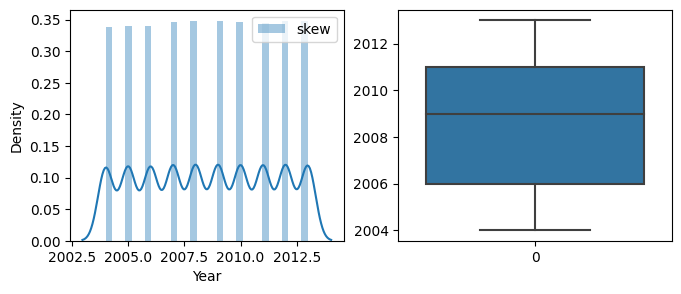

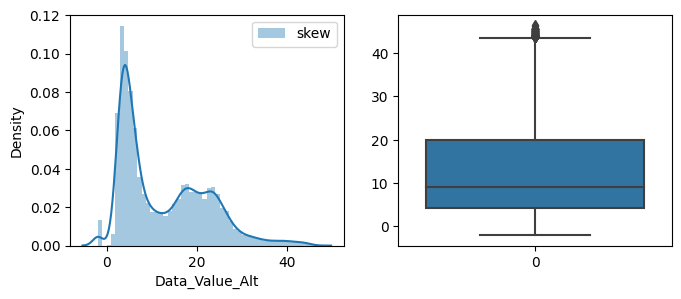

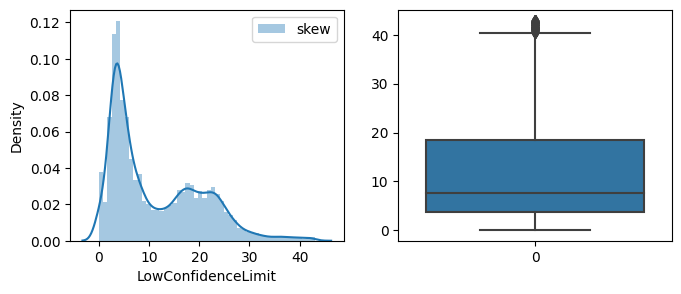

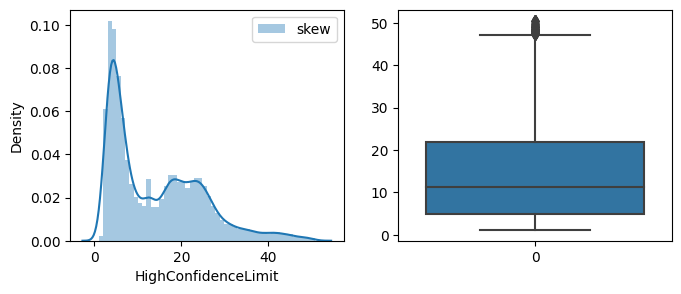

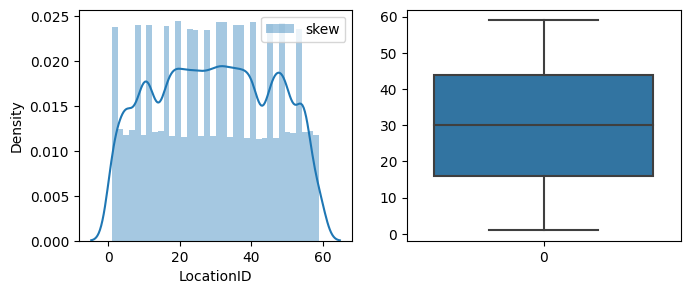

In [ ]:
#Lets verify the removal of outliers graphically
#Visualization

from scipy import stats
for col in data1.describe().columns:
  plt.figure(figsize=(12,3))

# Skewness Distribution
  plt.subplot(131)
  sns.distplot(data1[col], label="skew" )
  plt.legend()

# Boxplot - For outliers detection
  plt.subplot(132)
  sns.boxplot(data1[col])
  plt.show()

**Cleaning of categorical features**

In [ ]:
compare_location = pd.DataFrame({'LocationAbbr': data1.LocationAbbr,
                             'LocationDesc': data1.LocationDesc})
compare_location.value_counts()

LocationAbbr  LocationDesc  
AZ            Arizona           813
UT            Utah              812
CO            Colorado          810
NM            New Mexico        810
OR            Oregon            808
WA            Washington        805
DC            Washington, DC    805
NV            Nevada            804
CA            California        803
AK            Alaska            801
KS            Kansas            800
IA            Iowa              799
ID            Idaho             797
NE            Nebraska          796
MT            Montana           796
HI            Hawaii            796
WY            Wyoming           795
WI            Wisconsin         792
VT            Vermont           792
GA            Georgia           789
SD            South Dakota      789
NC            North Carolina    789
NH            New Hampshire     787
ME            Maine             786
VA            Virginia          786
SC            South Carolina    786
MD            Maryland          782

From above we can observe that LocationAbbr is the abbrevation of LocationDesc.We can drop these columns as they are unnecessary for prediction.

In [ ]:
compare_topic = pd.DataFrame({'Topic': data1.Topic,
                             'TopicId': data1.TopicId})
compare_topic.value_counts()

Topic                                       TopicId
Heart Failure                               T5         17126
Stroke                                      T6          4680
Acute Myocardial Infarction (Heart Attack)  T3          4679
Coronary Heart Disease                      T4          4679
Diseases of the Heart (Heart Disease)       T2          4674
Major Cardiovascular Disease                T1          4667
dtype: int64

In [ ]:
compare_breakout = pd.DataFrame({'Break_Out': data1.Break_Out,
                             'BreakOutId': data1.BreakOutId})
compare_breakout.value_counts()

Break_Out           BreakOutId
Female              GEN02         5031
Non-Hispanic White  RAC01         4983
Overall             OVR01         4977
Male                GEN01         4905
Other               RAC07         4889
Hispanic            RAC04         4747
Non-Hispanic Black  RAC02         4733
65+                 AGE06         3120
75+                 AGE08         3120
dtype: int64

In [ ]:
compare_breakout_cat = pd.DataFrame({'Break_Out_Category': data1.Break_Out_Category,
                           'BreakOutCategoryId': data1.BreakOutCategoryId})
compare_breakout_cat.value_counts()

Break_Out_Category  BreakOutCategoryId
Race                BOC04                 19352
Gender              BOC02                  9936
Age                 BOC03                  6240
Overall             BOC01                  4977
dtype: int64

In [ ]:
compare_area = pd.DataFrame({'PriorityArea1': data1.PriorityArea1,
                           'PriorityArea3': data1.PriorityArea3,
                           'Data_Value_Unit': data1.Data_Value_Unit})
compare_area.value_counts()

PriorityArea1   PriorityArea3        Data_Value_Unit
None            None                 Percent (%)        18699
                Healthy People 2020  Rate per 1,000     12447
Million Hearts  None                 Percent (%)         9359
dtype: int64

In [ ]:
#Dropping unwanted columns
b=['PriorityArea2', 'PriorityArea4','DataSource','Category','Data_Value_Type','LocationAbbr','LocationDesc','TopicId','BreakOutId','BreakOutCategoryId','CategoryId','LocationID','Data_Value_TypeID','IndicatorID']
for i in np.arange(len(b)):
    data1.drop(b[i], axis=1,inplace=True)

In [ ]:
data1.columns

Index(['Year', 'PriorityArea1', 'PriorityArea3', 'Topic', 'Indicator',
       'Data_Value_Unit', 'Data_Value_Alt', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'Break_Out_Category', 'Break_Out'],
      dtype='object')

In [ ]:
data1.shape

(40505, 11)

**Feature Engineering for Priority Area variables**

In [ ]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
#creating an instance LabelEncoder
label_en =LabelEncoder()

In [ ]:
#Create dummies for PriorityArea1
p1=pd.get_dummies(data1['PriorityArea1'])

#Create dummies for PriorityArea3
p3=pd.get_dummies(data1['PriorityArea3'])

#Concatenating PriorityAreas
data1=pd.concat([data1,p1,p3],axis=1)

In [ ]:
data1["Million Hearts"]=data1["Million Hearts"]*data1["PriorityArea1"]
data1["Healthy People 2020"]=data1["Healthy People 2020"]*data1["PriorityArea3"]

In [ ]:
data1.head()

,Year,PriorityArea1,PriorityArea3,Topic,Indicator,Data_Value_Unit,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,Million Hearts,None,Healthy People 2020,None
0,2006,None,None,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),5.2,5.1,5.3,Race,Other,,1,,1
1,2005,None,None,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),5.1,5.1,5.2,Race,Other,,1,,1
2,2007,None,None,Coronary Heart Disease,Prevalence of coronary heart disease hospitali...,Percent (%),8.5,8.4,8.5,Age,65+,,1,,1
3,2008,None,None,Coronary Heart Disease,Prevalence of coronary heart disease hospitali...,Percent (%),5.1,5.1,5.1,Gender,Female,,1,,1
4,2004,None,None,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),6.1,6.1,6.1,Overall,Overall,,1,,1


In [ ]:
#create new column "PriorityArea"
data1["PriorityArea"]=data1["Million Hearts"]+data1["Healthy People 2020"]

In [ ]:
#removing unwanted columns
data1=data1.drop(['None'],axis=1)

In [ ]:
#removing unwanted columns
data1=data1.drop(["Million Hearts","Healthy People 2020","PriorityArea1","PriorityArea3"],axis=1)

In [ ]:
#value counts of newcolumn
data1["PriorityArea"].value_counts()

                       18699
Healthy People 2020    12447
Million Hearts          9359
Name: PriorityArea, dtype: int64

In [ ]:
#label encoding new PriorityArea
data1["PriorityArea"]=label_en.fit_transform(data1["PriorityArea"])

In [ ]:
#value counts of newcolumn
data1["PriorityArea"].value_counts()

0    18699
1    12447
2     9359
Name: PriorityArea, dtype: int64

In [ ]:
data1.head()

,Year,Topic,Indicator,Data_Value_Unit,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,PriorityArea
0,2006,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),5.2,5.1,5.3,Race,Other,0
1,2005,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),5.1,5.1,5.2,Race,Other,0
2,2007,Coronary Heart Disease,Prevalence of coronary heart disease hospitali...,Percent (%),8.5,8.4,8.5,Age,65+,0
3,2008,Coronary Heart Disease,Prevalence of coronary heart disease hospitali...,Percent (%),5.1,5.1,5.1,Gender,Female,0
4,2004,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),6.1,6.1,6.1,Overall,Overall,0


In [ ]:
data1.shape

(40505, 10)

In [ ]:
data1.columns

Index(['Year', 'Topic', 'Indicator', 'Data_Value_Unit', 'Data_Value_Alt',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'Break_Out_Category',
       'Break_Out', 'PriorityArea'],
      dtype='object')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40505 entries, 0 to 42639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 40505 non-null  int64  
 1   Topic                40505 non-null  object 
 2   Indicator            40505 non-null  object 
 3   Data_Value_Unit      40505 non-null  object 
 4   Data_Value_Alt       40505 non-null  float64
 5   LowConfidenceLimit   40505 non-null  float64
 6   HighConfidenceLimit  40505 non-null  float64
 7   Break_Out_Category   40505 non-null  object 
 8   Break_Out            40505 non-null  object 
 9   PriorityArea         40505 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 4.4+ MB


**Label Encoding**

In [ ]:
data1['Topic']=label_en.fit_transform(data1['Topic'])
data1['Indicator']=label_en.fit_transform(data1['Indicator'])
data1['Data_Value_Unit']=label_en.fit_transform(data1['Data_Value_Unit'])
data1['Break_Out_Category']=label_en.fit_transform(data1['Break_Out_Category'])
data1['Break_Out']=label_en.fit_transform(data1['Break_Out'])

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40505 entries, 0 to 42639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 40505 non-null  int64  
 1   Topic                40505 non-null  int64  
 2   Indicator            40505 non-null  int64  
 3   Data_Value_Unit      40505 non-null  int64  
 4   Data_Value_Alt       40505 non-null  float64
 5   LowConfidenceLimit   40505 non-null  float64
 6   HighConfidenceLimit  40505 non-null  float64
 7   Break_Out_Category   40505 non-null  int64  
 8   Break_Out            40505 non-null  int64  
 9   PriorityArea         40505 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 4.4 MB


In [ ]:
#Splitting Dataset
y=data1['Topic']
X=data1.drop('Topic',axis=1)

#**Model Building**

In [ ]:
#Importing necessary libraries for model buiding

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size = 0.2, random_state = 100)
print("Size of training set:", X_train1.shape)
print("Size of test set:", X_test1.shape)

Size of training set: (32404, 9)
Size of test set: (8101, 9)


**1.Multinomial Logistic Regression**

In [ ]:
lr1=LogisticRegression()
parameters = [{'penalty':['l1','l2','elasticNet']},{'multi_class':['multinomial']},
              {'C':[1, 10, 100, 1000]}]
grid_lr1 = GridSearchCV(estimator =lr1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_lr1.fit(X_train1,y_train1)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticNet']},
                         {'multi_class': ['multinomial']},
                         {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
y_pred_train1=grid_lr1.predict(X_train1)
y_pred_test1=grid_lr1.predict(X_test1)

In [ ]:
#Classification report of train data
print(classification_report(y_pred_train1,y_train1))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3731
           1       0.92      0.91      0.91      3747
           2       0.99      0.99      0.99      3732
           3       0.95      0.94      0.95     13805
           4       0.86      0.87      0.86      3682
           5       0.91      0.91      0.91      3707

    accuracy                           0.93     32404
   macro avg       0.92      0.92      0.92     32404
weighted avg       0.93      0.93      0.93     32404



In [ ]:
#Classification report of test data
print(classification_report(y_pred_test1,y_test1))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       891
           1       0.92      0.91      0.91       952
           2       0.99      0.99      0.99       954
           3       0.96      0.94      0.95      3449
           4       0.85      0.89      0.87       890
           5       0.90      0.90      0.90       965

    accuracy                           0.93      8101
   macro avg       0.92      0.92      0.92      8101
weighted avg       0.93      0.93      0.93      8101



In [ ]:
#Accuracy Score
ascore_lr_train1=accuracy_score(y_pred_train1,y_train1)
ascore_lr_train1

0.9293297123811876

In [ ]:
#Accuracy Score
ascore_lr1=accuracy_score(y_pred_test1,y_test1)
ascore_lr1

0.9287742254042711

**2.Decision Tree**

In [ ]:
d_tree1 = DecisionTreeClassifier()
grid_dtc1 = GridSearchCV(d_tree1, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 7)
grid_dtc1.fit(X_train1, y_train1)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy')

In [ ]:
y_pred_train_dtg1 = grid_dtc1.predict(X_train1)
y_pred_test_dtg1 = grid_dtc1.predict(X_test1)

In [ ]:
#Classification report for train data
print(classification_report(y_train1,y_pred_train_dtg1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3760
           1       1.00      1.00      1.00      3732
           2       1.00      1.00      1.00      3724
           3       1.00      1.00      1.00     13732
           4       1.00      1.00      1.00      3743
           5       1.00      1.00      1.00      3713

    accuracy                           1.00     32404
   macro avg       1.00      1.00      1.00     32404
weighted avg       1.00      1.00      1.00     32404



In [ ]:
#Classification report for test data
print(classification_report(y_test1,y_pred_test_dtg1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       919
           1       1.00      1.00      1.00       947
           2       1.00      1.00      1.00       950
           3       1.00      1.00      1.00      3394
           4       1.00      1.00      1.00       924
           5       1.00      1.00      1.00       967

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



In [ ]:
#Accuracy Score
ascore_dtg_train1=accuracy_score(y_pred_test_dtg1,y_test1)
ascore_dtg_train1

1.0

In [ ]:
#Accuracy Score
ascore_dtg1=accuracy_score(y_pred_test_dtg1,y_test1)
ascore_dtg1

1.0

**3.KNN**

In [ ]:
knn1 = KNeighborsClassifier()
k_range = list(range(1,41))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
knn_grid1 = GridSearchCV(knn1, param_grid, cv=7, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
knn_grid1.fit(X_train1, y_train1)

Fitting 7 folds for each of 40 candidates, totalling 280 fits


GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=1)

In [ ]:
y_pred_train_knn1=knn_grid1.predict(X_train1)
y_pred_test_knn1=knn_grid1.predict(X_test1)

In [ ]:
#Classification report for train data
print(classification_report(y_train1,y_pred_train_knn1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3760
           1       1.00      1.00      1.00      3732
           2       1.00      1.00      1.00      3724
           3       1.00      1.00      1.00     13732
           4       1.00      1.00      1.00      3743
           5       1.00      1.00      1.00      3713

    accuracy                           1.00     32404
   macro avg       1.00      1.00      1.00     32404
weighted avg       1.00      1.00      1.00     32404



In [ ]:
#Classification report for test data
print(classification_report(y_test1,y_pred_test_knn1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       919
           1       0.99      0.99      0.99       947
           2       1.00      1.00      1.00       950
           3       0.99      1.00      1.00      3394
           4       1.00      0.98      0.99       924
           5       1.00      1.00      1.00       967

    accuracy                           0.99      8101
   macro avg       1.00      0.99      0.99      8101
weighted avg       0.99      0.99      0.99      8101



In [ ]:
#Accuracy Score
ascore_knn_train1=accuracy_score(y_pred_train_knn1,y_train1)
ascore_knn_train1

1.0

In [ ]:
#Accuracy Score
ascore_knn1=accuracy_score(y_pred_test_knn1,y_test1)
ascore_knn1

0.994198247129984

In [ ]:
model_list1 = ['Logistic regression','Decision Tree','KNN']
train_result_list1 = [ascore_lr_train1*100,ascore_dtg_train1*100,ascore_knn_train1*100]
result_list1 = [ascore_lr1*100,ascore_dtg1*100,ascore_knn1*100]

df_result1 = pd.DataFrame()
df_result1['Model name'] = model_list1
df_result1['Accuracy Score (Train)'] = train_result_list1
df_result1['Accuracy Score(Test)'] = result_list1

df_result1

,Model name,Accuracy Score (Train),Accuracy Score(Test)
0,Logistic regression,92.932971,92.877423
1,Decision Tree,100.000000,100.000000
2,KNN,100.000000,99.419825


#**Principal Component Analysis**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
scaled_data=scaler.transform(X)

In [ ]:
scaled_data

array([[-0.87992512, -0.00548801, -0.66604564, ...,  0.93145347,
         1.08812718, -0.96211476],
       [-1.22861531, -0.00548801, -0.66604564, ...,  0.93145347,
         1.08812718, -0.96211476],
       [-0.53123494, -0.72956527, -0.66604564, ..., -1.66639289,
        -1.74521049, -0.96211476],
       ...,
       [ 1.21221598, -1.0916039 , -0.66604564, ...,  0.93145347,
        -0.53092292,  1.53879706],
       [ 1.56090616, -1.0916039 , -0.66604564, ...,  0.93145347,
         0.68336465,  1.53879706],
       [ 1.21221598, -1.0916039 , -0.66604564, ..., -0.80044411,
        -0.1261604 ,  1.53879706]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)

In [ ]:
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
x_pca=pca.transform(scaled_data)

In [ ]:
print('scaled_data shape',scaled_data.shape)
print('x_pca shape',x_pca.shape)

scaled_data shape (40505, 9)
x_pca shape (40505, 2)


In [ ]:
x_pca

array([[-0.93616997, -0.93300392],
       [-0.93435374, -0.91549256],
       [-1.38811939,  2.38972866],
       ...,
       [-1.81263148, -0.80683989],
       [-1.91088661, -1.55138002],
       [-2.27798737, -0.1610013 ]])

Text(0, 0.5, 'Second principle component')

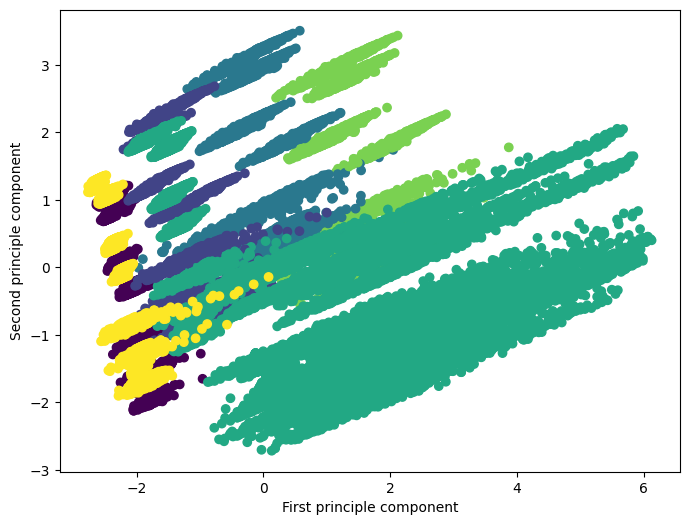

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

#**Train Test Split**

In [ ]:
#Train-Test Split after applying PCA
X_train, X_test, y_train, y_test = train_test_split(x_pca,y, test_size = 0.2, random_state = 100)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (32404, 2)
Size of test set: (8101, 2)


#**Model Building after PCA application**

**1.Logistic Regression**

In [ ]:
lr=LogisticRegression()
parameters = [{'penalty':['l1','l2','elasticNet']},{'multi_class':['multinomial']},
              {'C':[1, 10, 100, 1000]}]
grid_lr = GridSearchCV(estimator =lr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_lr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticNet']},
                         {'multi_class': ['multinomial']},
                         {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
y_pred_train=grid_lr.predict(X_train)
y_pred_test=grid_lr.predict(X_test)

In [ ]:
#Classification report of train data
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59      3601
           1       0.60      0.54      0.57      4142
           2       0.41      0.74      0.53      2056
           3       0.82      0.69      0.75     16309
           4       0.45      0.70      0.55      2421
           5       0.63      0.60      0.61      3875

    accuracy                           0.65     32404
   macro avg       0.58      0.65      0.60     32404
weighted avg       0.69      0.65      0.66     32404



In [ ]:
#Classification report of test data
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.61      0.60      0.61       935
           1       0.64      0.57      0.60      1068
           2       0.40      0.78      0.53       485
           3       0.82      0.69      0.75      4058
           4       0.47      0.71      0.57       608
           5       0.63      0.64      0.64       947

    accuracy                           0.66      8101
   macro avg       0.60      0.67      0.61      8101
weighted avg       0.70      0.66      0.67      8101



In [ ]:
#Accuracy Score
ascore_lr_train=accuracy_score(y_pred_train,y_train)
ascore_lr_train

0.6528823602024442

In [ ]:
#Accuracy Score
ascore_lr=accuracy_score(y_pred_test,y_test)
ascore_lr

0.664732749043328

**2.KNN Classifier**

In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(1,41))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
knn_grid = GridSearchCV(knn, param_grid, cv=7, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
knn_grid.fit(X_train, y_train)

Fitting 7 folds for each of 40 candidates, totalling 280 fits


GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=1)

In [ ]:
y_pred_train_knn=knn_grid.predict(X_train)
y_pred_test_knn=knn_grid.predict(X_test)

In [ ]:
#Classification report for train data
print(classification_report(y_train,y_pred_train_knn))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3760
           1       0.94      0.93      0.94      3732
           2       0.97      0.98      0.98      3724
           3       0.97      0.97      0.97     13732
           4       0.95      0.96      0.95      3743
           5       0.96      0.94      0.95      3713

    accuracy                           0.96     32404
   macro avg       0.96      0.95      0.96     32404
weighted avg       0.96      0.96      0.96     32404



In [ ]:
#Classification report for test data
print(classification_report(y_test,y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       919
           1       0.90      0.89      0.90       947
           2       0.95      0.97      0.96       950
           3       0.95      0.94      0.94      3394
           4       0.92      0.92      0.92       924
           5       0.93      0.90      0.92       967

    accuracy                           0.93      8101
   macro avg       0.92      0.92      0.92      8101
weighted avg       0.93      0.93      0.93      8101



In [ ]:
#Accuracy Score
ascore_knn_train=accuracy_score(y_pred_train_knn,y_train)
ascore_knn_train

0.9588013825453647

In [ ]:
#Accuracy Score
ascore_knn=accuracy_score(y_pred_test_knn,y_test)
ascore_knn

0.929885199358104

**3.Decision Tree Classifier**

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=5)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred_train_dt=d_tree.predict(X_train)
y_pred_test_dt=d_tree.predict(X_test)

In [ ]:
#Classification report for train data
print(classification_report(y_train,y_pred_train_dt))

              precision    recall  f1-score   support

           0       0.57      0.91      0.70      3760
           1       0.66      0.57      0.61      3732
           2       0.86      0.89      0.87      3724
           3       0.87      0.84      0.86     13732
           4       0.78      0.86      0.82      3743
           5       0.83      0.43      0.56      3713

    accuracy                           0.78     32404
   macro avg       0.76      0.75      0.74     32404
weighted avg       0.79      0.78      0.77     32404



In [ ]:
#Classification report for test data
print(classification_report(y_test,y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.55      0.91      0.68       919
           1       0.66      0.55      0.60       947
           2       0.86      0.90      0.88       950
           3       0.87      0.84      0.85      3394
           4       0.78      0.86      0.82       924
           5       0.84      0.42      0.56       967

    accuracy                           0.77      8101
   macro avg       0.76      0.75      0.73      8101
weighted avg       0.79      0.77      0.77      8101



In [ ]:
#Accuracy Score
ascore_dt_train=accuracy_score(y_pred_train_dt,y_train)
ascore_dt_train

0.7786075793111962

In [ ]:
#Accuracy Score
ascore_dt=accuracy_score(y_pred_test_dt,y_test)
ascore_dt

0.7720034563634119

**4.XGBoost Classifier**

In [ ]:
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
xgb_clf= XGBClassifier(**params)
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...)

In [ ]:
print(xgb_clf)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...)


In [ ]:
y_pred_train_xgb=xgb_clf.predict(X_train)
y_pred_test_xgb= xgb_clf.predict(X_test)

In [ ]:
#Classification report for train data
print(classification_report(y_train,y_pred_train_xgb))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3760
           1       0.91      0.88      0.90      3732
           2       0.94      0.96      0.95      3724
           3       0.95      0.94      0.94     13732
           4       0.90      0.93      0.91      3743
           5       0.91      0.88      0.90      3713

    accuracy                           0.92     32404
   macro avg       0.92      0.92      0.92     32404
weighted avg       0.93      0.92      0.92     32404



In [ ]:
#Classification report for test data
print(classification_report(y_test,y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       919
           1       0.89      0.88      0.88       947
           2       0.93      0.95      0.94       950
           3       0.94      0.92      0.93      3394
           4       0.87      0.92      0.90       924
           5       0.93      0.87      0.90       967

    accuracy                           0.92      8101
   macro avg       0.90      0.91      0.91      8101
weighted avg       0.92      0.92      0.92      8101



In [ ]:
#Accuracy Score
ascore_xgb_train=accuracy_score(y_pred_train_xgb,y_train)
ascore_xgb_train

0.9249166769534626

In [ ]:
#Accuracy Score
ascore_xgb=accuracy_score(y_pred_test_xgb,y_test)
ascore_xgb

0.915195654857425

#**Result**

In [ ]:
model_list = ['Logistic regression','KNN','Decision Tree','XGBoost']
train_result_list = [ascore_lr_train*100,ascore_knn_train*100,ascore_dt_train*100,ascore_xgb_train*100]
result_list = [ascore_lr*100,ascore_knn*100,ascore_dt*100,ascore_xgb*100]


df_result = pd.DataFrame()
df_result['Model name'] = model_list
df_result['Accuracy Score (Train)'] = train_result_list
df_result['Accuracy Score(Test)'] = result_list

df_result

,Model name,Accuracy Score (Train),Accuracy Score(Test)
0,Logistic regression,65.288236,66.473275
1,KNN,95.880138,92.988520
2,Decision Tree,77.860758,77.200346
3,XGBoost,92.491668,91.519565


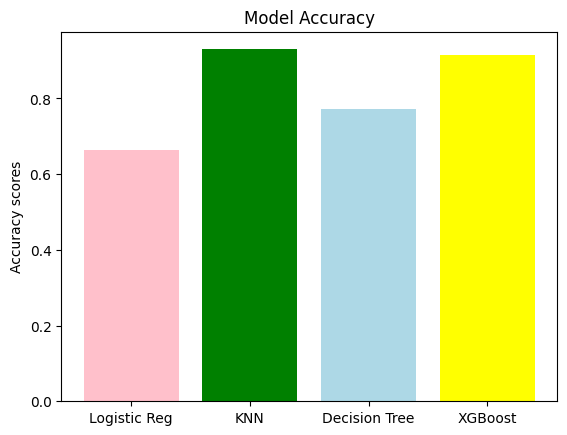

In [ ]:
#Bar graph of accuracy score of models perfromed
models = ['Logistic Reg', 'KNN','Decision Tree','XGBoost']
acc_scores=[ascore_lr,ascore_knn,ascore_dt,ascore_xgb]
plt.bar(models, acc_scores, color=['pink', 'green', 'lightblue','yellow'])
plt.ylabel("Accuracy scores")
plt.title("Model Accuracy")
plt.show()

#**Conclusion**

After passing through different models, accuracy of KNN is high as compared to others. Therefore, KNN is choosen as the best model for predicting heart disease dataset.

**Verification**


**Topic :**

0:Major Cardiovascular Disease                     

1:Stroke                                           

2:Diseases of the Heart (Heart Disease)            

3:Heart Failure                                    

4:Acute Myocardial Infarction (Heart Attack)       

5:Coronary Heart Disease                           


**Indicator :**

0 : Prevalence of all heart disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)

1 : Prevalence of heart failure hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)  
         
                                
2 : Prevalence of cerebrovascular disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries(65+)


3 : Prevalence of major cardiovascular disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries(65+)

4 : Prevalence of coronary heart disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)

5 : Prevalence of heart attack hospitalizations among all hospitalizations, US Medicare FFS beneficiaries(65+)

6 : Rate of hospitalizations among older adults with heart failure as the principal diagnosis (among FFS Medicare beneficiaries(65+)                  
        
7 : Rate of hospitalizations among adults aged 75 to 84 years with heart failure as the principal diagnosis (among FFS Medicare beneficiaries(65+)

8 : Rate of hospitalizations among adults aged 85 years and older with heart failure as the principal diagnosis (among FFS Medicare beneficiaries (65+))    

9 : Rate of hospitalizations among adults aged 65 to 74 years with heart failure as the principal diagnosis (among FFS Medicare beneficiaries (65+))



**Data_Value_Unit :**

1 : Percent (%)       
2 : Rate per 1,000    


**Break_Out_Category :**

0 : Age

1 : Gender          
2 : Overall     
3 : Race


**Break_Out :**

0 : 65+                   
1 : 75+

2 : Other

3 : Hispanic  
4 : Non-Hispanic Black  
5 : Non-Hispanic White             
6 : Female
7 : Male                 
8 : Overall               
   
                 
              
    
                   


In [ ]:
print("Enter details for prediction")
a = int(input("Year: "))
b = float(input("Indicator: "))
c = float(input("Data_Value_Unit: "))
d = float(input("Data_Value_Alt: "))
e = float(input("LowConfidenceLimit:"))
f = float(input("HighConfidenceLimit: "))
g = float(input("Break_Out_Category: "))
h = float(input("Break_Out: "))
i = float(input("PriorityArea: "))


features = [[a, b, c, d, e, f,g,h,i]]
scaled_data=scaler.transform(features)
x_pca=pca.transform(scaled_data)


print("========================================================================================")

print("Prediction : ", knn_grid.predict(x_pca))

o=knn_grid.predict(x_pca)

def disease_prediction (o):

  s=''

  if o ==0:
    s='Major Cardiovascular Disease'
  elif o ==1:
    s='Stroke'
  elif o ==2:
    s='Diseases of the Heart (Heart Disease)'
  elif o ==3:
    s='Heart Failure'
  elif o ==4:
    s='Acute Myocardial Infarction (Heart Attack)'
  elif o ==5:
    s='Coronary Heart Disease'
  else:
    s='Invalid Details'
  return s

print(disease_prediction (o))

Enter details for prediction
